In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz

# from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split

# from catboost import CatBoostClassifier, MetricVisualizer, Pool, cv
from sklearn.metrics import accuracy_score
from sklearn.tree import export_text


df = pd.read_csv("./mental-heath-in-tech-2016_20161114.csv")

pd.set_option('max_colwidth', 300)
pd.set_option('max_columns', 70)

# Information

df.info() for overview

## Column Access

- Actual name (very long)
- by index via `iloc[:, i]`
- shorten the names of the columns
    
## Columns to be dropped

Check in code blocks below where the data gets analyzed and then columns with too many different answers get dropped.

**This changes the indeces!**

## Questions

0. Are you self-employed?
1. How many employees does your company or organization have? **[NaN]**
2. Is your employer primarily a tech company/organization? **[NaN]**
3. Is your primary role within your company related to tech/IT? **[NaN]**
4. Does your employer provide mental health benefits as part of healthcare coverage?
5. Do you know the options for mental health care available under your employer-provided coverage?
6. Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?
7. Does your employer offer resources to learn more about mental health concerns and options for seeking help?
8. Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?
9. If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:
10. Do you think that discussing a mental health disorder with your employer would have negative consequences? **[NaN]**
11. Do you think that discussing a physical health issue with your employer would have negative consequences? **[NaN]**
12. Would you feel comfortable discussing a mental health disorder with your coworkers? **[NaN]**
13. Would you feel comfortable discussing a mental health disorder with your direct supervisor(s)? **[NaN]**
14. Do you feel that your employer takes mental health as seriously as physical health?
15. Have you heard of or observed negative consequences for co-workers who have been open about mental health issues in your workplace? **[NaN]**
16. Do you have medical coverage (private insurance or state-provided) which includes treatment of  mental health issues? **[NaN]**
17. Do you know local or online resources to seek help for a mental health disorder? **[NaN]**
18. If you have been diagnosed or treated for a mental health disorder, do you ever reveal this to clients or business contacts? **[NaN]**
19. [FOLLOW-UP] If you have revealed a mental health issue to a client or business contact, do you believe this has impacted you negatively? **[NaN]**
20. If you have been diagnosed or treated for a mental health disorder, do you ever reveal this to coworkers or employees? **[NaN]**
21. [FOLLOW-UP] If you have revealed a mental health issue to a coworker or employee, do you believe this has impacted you negatively? **[NaN]**
22. Do you believe your productivity is ever affected by a mental health issue? **[NaN]**
23. [FOLLOW-UP] If yes, what percentage of your work time (time performing primary or secondary job functions) is affected by a mental health issue? **[NaN]**
24. Do you have previous employers?
25. Have your previous employers provided mental health benefits?
26. [FOLLOW-UP] Were you aware of the options for mental health care provided by your previous employers? **[NaN]**
27. Did your previous employers ever formally discuss mental health (as part of a wellness campaign or other official communication)?
28. Did your previous employers provide resources to learn more about mental health issues and how to seek help? **[NaN]**
29. Was your anonymity protected if you chose to take advantage of mental health or substance abuse treatment resources with previous employers?
30. Do you think that discussing a mental health disorder with previous employers would have negative consequences?
31. Do you think that discussing a physical health issue with previous employers would have negative consequences? (no I don't know option available/selected) **[NaN]**
32. Would you have been willing to discuss a mental health issue with your previous co-workers? **[NaN]**
33. Would you have been willing to discuss a mental health issue with your direct supervisor(s)?
34. Did you feel that your previous employers took mental health as seriously as physical health?
35. Did you hear of or observe negative consequences for co-workers with mental health issues in your previous workplaces? **[NaN]**
36. Would you be willing to bring up a physical health issue with a potential employer in an interview? **[NaN]**
37. [FREE TEXT] [FOLLOW-UP] Why or why not? **[NaN]**
38. Would you bring up a mental health issue with a potential employer in an interview? **[NaN]**
39. [FREE TEXT] [FOLLOW-UP] Why or why not? **[NaN]**
40. Do you feel that being identified as a person with a mental health issue would hurt your career? **[NaN]**
41. Do you think that team members/co-workers would view you more negatively if they knew you suffered from a mental health issue? **[NaN]**
42. How willing would you be to share with friends and family that you have a mental illness? **[NaN]**
43. Have you observed or experienced an unsupportive or badly handled response to a mental health issue in your current or previous workplace? **[NaN]**
44. Have your observations of how another individual who discussed a mental health disorder made you less likely to reveal a mental health issue yourself in your current workplace? **[NaN]**
45. Do you have a family history of mental illness?
46. Have you had a mental health disorder in the past? **[NaN]**
47. Do you currently have a mental health disorder? **[NaN]**
48. [FOLLOW-UP] [MULTIPLE] If yes, what condition(s) have you been diagnosed with? **[NaN]**
49. [FOLLOW-UP] [MULTIPLE] If maybe, what condition(s) do you believe you have? **[NaN]**
50. Have you been diagnosed with a mental health condition by a medical professional? **[NaN]**
51. [FOLLOW-UP] [MULTIPLE] If so, what condition(s) were you diagnosed with? **[NaN]**
52. Have you ever sought treatment for a mental health issue from a mental health professional?
53. [FOLLOW-UP] If you have a mental health issue, do you feel that it interferes with your work when being treated effectively? **[NaN]**
54. [FOLLOW-UP] If you have a mental health issue, do you feel that it interferes with your work when NOT being treated effectively?
55. What is your age? [REMOVE 323, 3, 99 (?)]
56. What is your gender?
57. What country do you live in?
58. What US state or territory do you live in? **[NaN]**
59. What country do you work in?
60. What US state or territory do you work in? **[NaN]**
61. [MULTIPLE] Which of the following best describes your work position?
62. Do you work remotely?

In [2]:
# Drop unwanted data

# Drop all self-employed as we only want to analyze people in companies.
df = df.drop(df[(df.iloc[:,0] == 1)].index)

# Drop 24 - 35 because we want to analyze the answers related to their current job.
# Drop questions for only self-employed people
df = df.drop(df.columns[list(range(16, 36))], axis = 1)

# Check what columns have too many choices
# Change float to int
# Fill nan with either 'nan' or -999
for ind, column in enumerate(df.columns):
    if len(df.iloc[:, ind].value_counts()) > 20:
        print(ind, column)
        print('Different answers: ', len(df[column].value_counts()))
    if (df.iloc[:, ind].dtype == np.float64) | (df.iloc[:, ind].dtype == np.int64):
        df.iloc[:, ind] = df.iloc[:, ind].fillna(-999)
        df.iloc[:, ind] = df.iloc[:, ind].astype(np.int64)

# 35, 36  stay, rest goes (after analyzing)
# Drop the rest [37, 39, 48, 49, 51, 58, 60, 61]:
df = df.drop(df.columns[[17, 19, 28, 29, 31, 37, 38, 39, 40, 41]], axis = 1)

# Drop 3 because this survey is directed at people in IT and we just care about that.
df = df.drop(df.columns[[3]], axis = 1)



17 Why or why not?
Different answers:  863
19 Why or why not?.1
Different answers:  860
28 If yes, what condition(s) have you been diagnosed with?
Different answers:  101
29 If maybe, what condition(s) do you believe you have?
Different answers:  77
31 If so, what condition(s) were you diagnosed with?
Different answers:  90
35 What is your age?
Different answers:  51
36 What is your gender?
Different answers:  61
37 What country do you live in?
Different answers:  43
38 What US state or territory do you live in?
Different answers:  47
39 What country do you work in?
Different answers:  44
40 What US state or territory do you work in?
Different answers:  48
41 Which of the following best describes your work position?
Different answers:  180


In [3]:
# Clean Data
# Handle NaN (This is just an idea, doesn't need to be done 100%)
# might be useless as these may be self-employed nan's
# df.iloc[:, [4, 6, 7, 8, 9, 14, 25, 27, 29, 30, 34]] = df.iloc[:, [4, 6, 7, 8, 9, 14, 25, 27, 29, 30, 34]].fillna("I don't know")

# 5: Do you know the options for mental health care available under your employer-provided coverage?
# Not answering most likely means they are not sure.
df["Do you know the options for mental health care available under your employer-provided coverage?"].fillna('I am not sure', inplace=True)
df["Do you know the options for mental health care available under your employer-provided coverage?"].replace('I am not sure', 'I\'m not sure', inplace=True)

# 43: Have you observed or experienced an unsupportive or badly handled response to a mental health issue in your current or previous workplace?
# Not answering most likely means they are not sure.
df["Have you observed or experienced an unsupportive or badly handled response to a mental health issue in your current or previous workplace?"].fillna('Maybe/Not sure', inplace=True)

# 44: Have your observations of how another individual who discussed a mental health disorder made you less likely to reveal a mental health issue yourself in your current workplace?
# around 500 did not answer -> not applicable
df["Have your observations of how another individual who discussed a mental health disorder made you less likely to reveal a mental health issue yourself in your current workplace?"].fillna('n/a', inplace=True)


male = ['Male', 'male', 'Male ', 'M', 'm', 'man', 'Cis male', 'Male.', 'Male. ', 'Male (cis)', 'Man', 'Sex is male',
        'cis male', 'Malr', 'Dude', 'mail', 'M|', 'male ', 'Cis Male', 'cisdude', 'cis man', 'MALE',
        "I'm a man why didn't you make this a drop down question. You should of asked sex? And I would of answered yes please. Seriously how much text can this take? "]
female = ['Female', 'female', 'I identify as female.', 'female ', 'Female assigned at birth ', 'F', 'Woman', 'f',
          'Cis female ', 'Female ', 'woman', 'female/woman', 'Cisgender Female', 'fem', 'Female (props for making this a freeform field, though)',
          ' Female', 'Cis-woman']
other = ['Bigender', 'non-binary', 'fm', 'Transitioned, M2F', 'Genderfluid (born female)', 'Other/Transfeminine',
         'Female or Multi-Gender Femme', 'Androgynous', 'male 9:1 female, roughly', 'Other', 'nb masculine',
         'none of your business', 'genderqueer', 'Human','Genderfluid', 'Enby','genderqueer woman', 'mtf', 'Queer',
         'Agender', 'Fluid', 'Male/genderqueer', 'Nonbinary', 'human', 'Unicorn', 'Male (trans, FtM)',
         'Genderqueer', 'Genderflux demi-girl', 'female-bodied; no feelings about gender', 'AFAB', 'Transgender woman', 'nan']

df["What is your gender?"].replace(male, 'male', inplace=True)
df["What is your gender?"].replace(female, 'female', inplace=True)
df["What is your gender?"].replace(other, 'other', inplace=True)
df["What is your gender?"].fillna('other', inplace=True);

# Clean age by replacing the wrong ages with the mean value.
mean = df["What is your age?"].mean()
mean = round(mean)
df.loc[(df["What is your age?"] < 15) | (df["What is your age?"] > 90),"What is your age?"] =  mean

# We interpret the answer n/a here as no [4. Does your employer provide mental health benefits as part of healthcare coverage?]
# Everyone should be applicable here.
df["Does your employer provide mental health benefits as part of healthcare coverage?"].replace('Not eligible for coverage / N/A', 'No', inplace=True)


df["What is your gender?"].unique()

array(['male', 'female', 'other'], dtype=object)

In [4]:
# ENCODING (Encode categorical data ordinal where it does make sense)

# company size ordinal
df = df.rename(columns = {'How many employees does your company or organization have?':'company_size'})
company_size_mapper = {'1-5':1, '6-25':6, '26-100':26, '100-500':100, '500-1000':500, 'More than 1000':1000}
df["company_size"] = df["company_size"].replace(company_size_mapper)
# df["company_size"] = df["company_size"].astype(np.int64)

# age in groups and ordinal
age_labels = ["17-25", "26-34", "35-44", "45-54", "over 55"]
df["What is your age?"] = pd.cut(x=df['What is your age?'], bins=[0,25,34,44,54,100], labels=age_labels)
age_group_mapper = {'17-25':1, '26-34':2, '35-44':3, '45-54':4, 'over 55':5}
df["What is your age?"] = df["What is your age?"].replace(age_group_mapper)

# shorten column names
df = df.rename(columns = {'Is your employer primarily a tech company/organization?'
                          :'primarily_tech'})
df = df.rename(columns = {'Does your employer provide mental health benefits as part of healthcare coverage?'
                          :'provide_MH_healthcare'})
df = df.rename(columns = {'Do you know the options for mental health care available under your employer-provided coverage?'
                          :'know_available_MH_healthcare_employer'})
df = df.rename(columns = {'Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?'
                          :'discussed_MH'})
df = df.rename(columns = {'Have your observations of how another individual who discussed a mental health disorder made you less likely to reveal a mental health issue yourself in your current workplace?'
                          :'observation_less_likely_reveal'})
df = df.rename(columns = {'If you have a mental health issue, do you feel that it interferes with your work when NOT being treated effectively?'
                          :'MH_interference_not_treated'})
df = df.rename(columns = {'If you have a mental health issue, do you feel that it interferes with your work when being treated effectively?'
                          :'MH_interference_treated'})
df = df.rename(columns = {'Does your employer offer resources to learn more about mental health concerns and options for seeking help?'
                          :'employer_resources_options_for_MH'})
df = df.rename(columns = {'Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?'
                          :'anonymity_protected'})
df = df.rename(columns = {'If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:'
                          :'MH_asking_for_leave'})
df = df.rename(columns = {'Do you think that discussing a mental health disorder with your employer would have negative consequences?'
                          :'dicussing_MH_negative'})
df = df.rename(columns = {'Do you think that discussing a physical health issue with your employer would have negative consequences?'
                          :'dicussing_PH_negative'})
df = df.rename(columns = {'Would you feel comfortable discussing a mental health disorder with your coworkers?'
                          :'dicussing_MH_coworkers'})
df = df.rename(columns = {'Would you feel comfortable discussing a mental health disorder with your direct supervisor(s)?'
                          :'dicussing_MH_supervisor'})
df = df.rename(columns = {'Do you feel that your employer takes mental health as seriously as physical health?'
                          :'employer_MH_serious_as_PH'})
df = df.rename(columns = {'Have you heard of or observed negative consequences for co-workers who have been open about mental health issues in your workplace?'
                          :'observed_negative_cons_MH_coworker'})
df = df.rename(columns = {'Do you think that team members/co-workers would view you more negatively if they knew you suffered from a mental health issue?'
                          :'coworkers_negative_view_MH'})
df = df.rename(columns = {'How willing would you be to share with friends and family that you have a mental illness?'
                          :'share_MH_framily'})
df = df.rename(columns = {'Have you observed or experienced an unsupportive or badly handled response to a mental health issue in your current or previous workplace?'
                          :'observed_bad_response_MH'})
df = df.rename(columns = {'Have you ever sought treatment for a mental health issue from a mental health professional?'
                          :'sought_treatment'})
df = df.rename(columns = {'Would you be willing to bring up a physical health issue with a potential employer in an interview?'
                          :'PH_in_interview'})
df = df.rename(columns = {'Would you bring up a mental health issue with a potential employer in an interview?'
                          :'MH_in_interview'})
df = df.rename(columns = {'Do you have a family history of mental illness?'
                          :'MH_family_history'})
df = df.rename(columns = {'Have you had a mental health disorder in the past?'
                          :'MH_past'})
df = df.rename(columns = {'Do you currently have a mental health disorder?'
                          :'MH_currently'})

Do you currently have a mental health disorder?
df = df.rename(columns = {'What is your age?'
                          :'age'})
df = df.rename(columns = {'What is your gender?'
                          :'gender'})
df = df.rename(columns = {'Do you work remotely?'
                          :'remote'})


# Same for both no's and yes? TODO
coworkers_negative_view_MH_mapper = {'No, they do not':1, 'No, I don\'t think they would':2, 'Maybe':3, 'Yes, I think they would':4, 'Yes, they do':5}
df["coworkers_negative_view_MH"] = df["coworkers_negative_view_MH"].replace(coworkers_negative_view_MH_mapper)

# maybe reevaluate I don't know here! TODO
MH_asking_for_leave_mapper = {'Very difficult':1, 'Somewhat difficult':2, 'Somewhat difficult':3, 'Neither easy nor difficult':4, 'Somewhat easy':5, 'Very easy':6, 'I don\'t know':3}
df["MH_asking_for_leave"] = df["MH_asking_for_leave"].replace(MH_asking_for_leave_mapper)

# maybe reevaluate not applicable, but I think you are neutral if you choose that answer! TODO
share_MH_framily_mapper = {'Not open at all':1, 'Somewhat not open':2, 'Neutral':3, 'Not applicable to me (I do not have a mental illness)':3, 'Somewhat open':5, 'Very open':6}
df["share_MH_framily"] = df["share_MH_framily"].replace(share_MH_framily_mapper)




df_dummy = pd.get_dummies(df, dummy_na=False, drop_first=True)
# feature_names = df_dummy.columns.tolist() 

Object `disorder` not found.


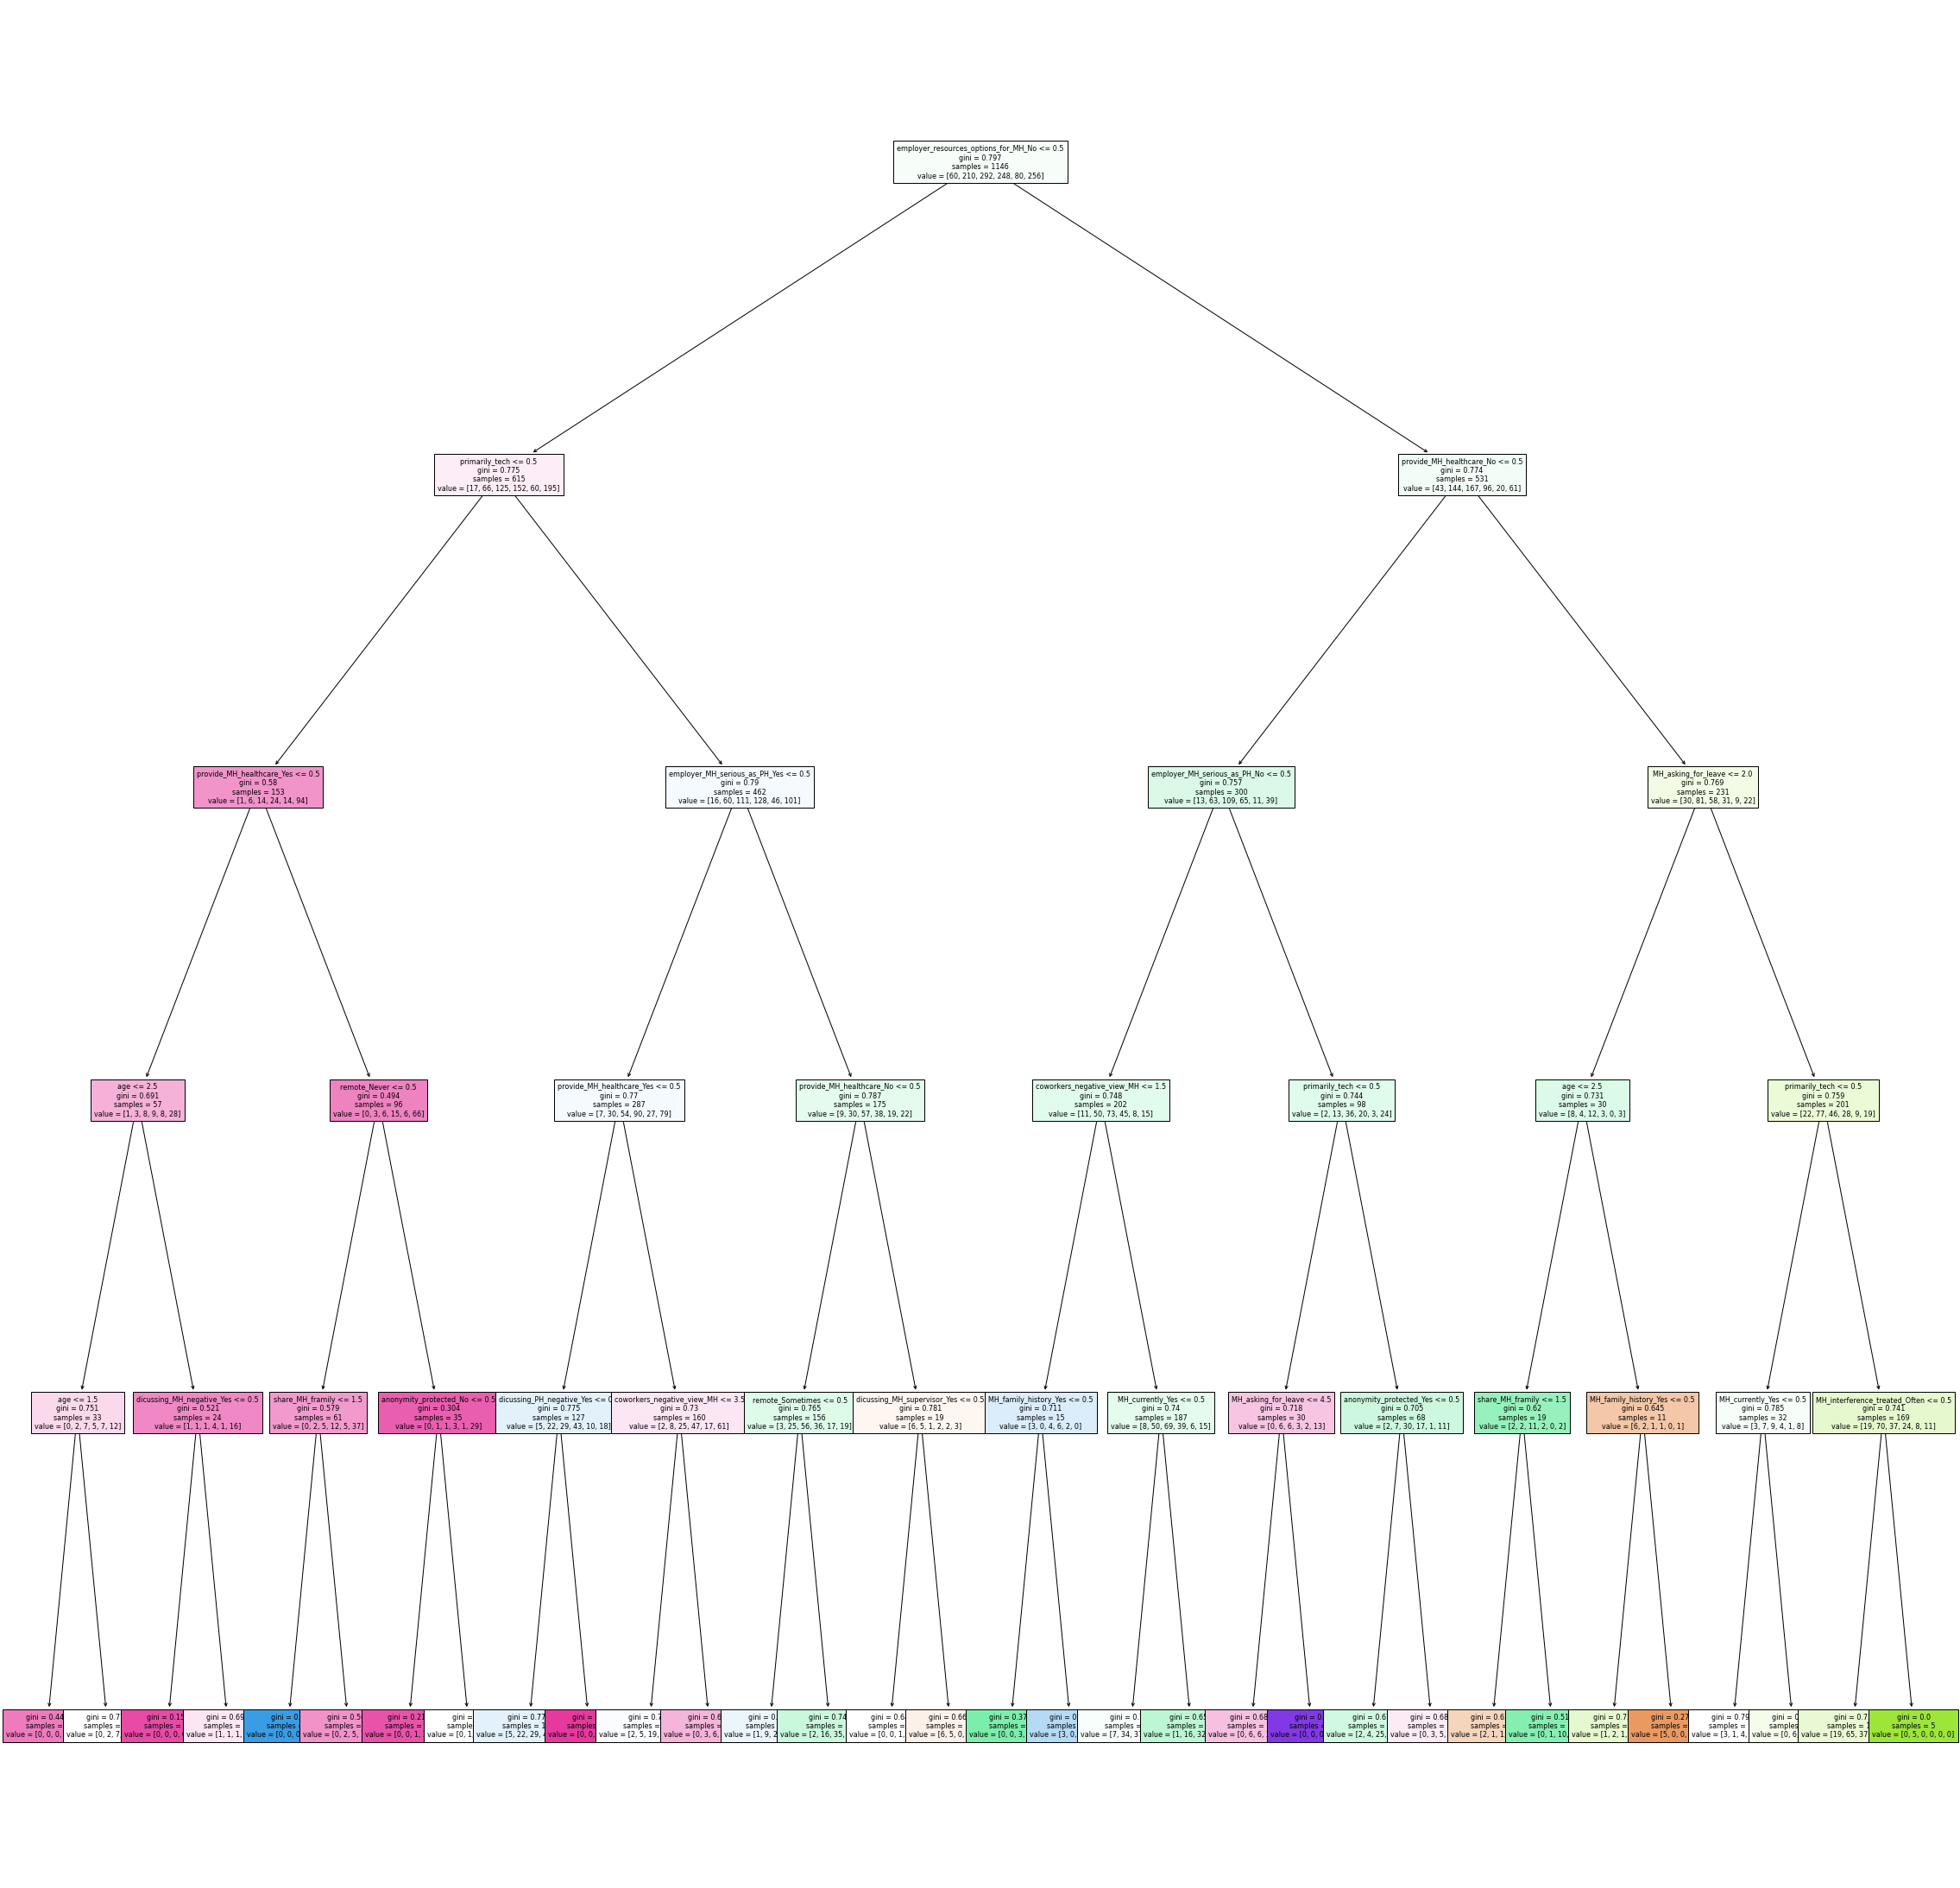

In [5]:
X = df_dummy.drop(["company_size"], axis=1, inplace=False)
y = df_dummy["company_size"]

# Here we should do more experiments with different parameters.
clf = tree.DecisionTreeClassifier(max_depth=5)

clf = clf.fit(X,y)

fig=plt.figure(figsize=(40, 40))
tree.plot_tree(clf, fontsize=8, feature_names=list(X), filled=True)
fig.savefig('decision_tree_plot.png', dpi=100)

In [ ]:
tree_rules = export_text(clf, feature_names=list(X))

text_file = open("Output.txt", "w")
text_file.write(tree_rules)
text_file.close()

In [ ]:
# Age plot (More of a template now)
plt.figure(figsize=(15,8))
plt.title("Age Distribution and Density")
plt.xlabel("Age")
plt.ylabel("Density")
sns.distplot(df['What is your age?'])

In [ ]:
# maybe drop if questions

df["share_MH_framily"].value_counts()